In [39]:
import geopandas as gpd
import pandas as pd
from pysal.model import spreg

c:\Users\b9066009\Anaconda3\envs\geo_env\lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
c:\Users\b9066009\Anaconda3\envs\geo_env\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [32]:
# load data
urban_types = gpd.read_parquet('./results/urban_types.parquet')
streets = gpd.read_parquet('./results/streets_morphology.parquet')
buildings = gpd.read_parquet('./results/buildings_morphology.parquet')
tessellation = gpd.read_parquet('./results/tessellation_morphology.parquet')

access = gpd.read_parquet('./results/hexagons_access.parquet')

In [ ]:
# data pre-processing


In [9]:
streets.head()

,geometry,nID,length,linearity,width,width_deviation,openness,mm_len,node_start,node_end
0,"LINESTRING (450802.513 6904414.822, 450787.299...",0,549.812066,0.976479,46.911383,2.313748,0.981481,549.812066,0,1
1,"LINESTRING (450424.568 6904033.512, 450447.735...",3,549.812066,0.976479,45.689615,1.970123,0.981481,549.812066,0,1
2,"LINESTRING (450802.513 6904414.822, 450727.952...",1,609.203073,0.992044,50.000000,0.000000,1.000000,609.203073,0,2
3,"LINESTRING (450198.297 6904427.853, 450223.990...",7,609.203073,0.992044,50.000000,0.000000,1.000000,609.203073,0,2
4,"LINESTRING (450802.513 6904414.822, 450852.007...",2,1593.134716,0.993170,50.000000,0.000000,1.000000,1593.134716,0,3


<AxesSubplot:>

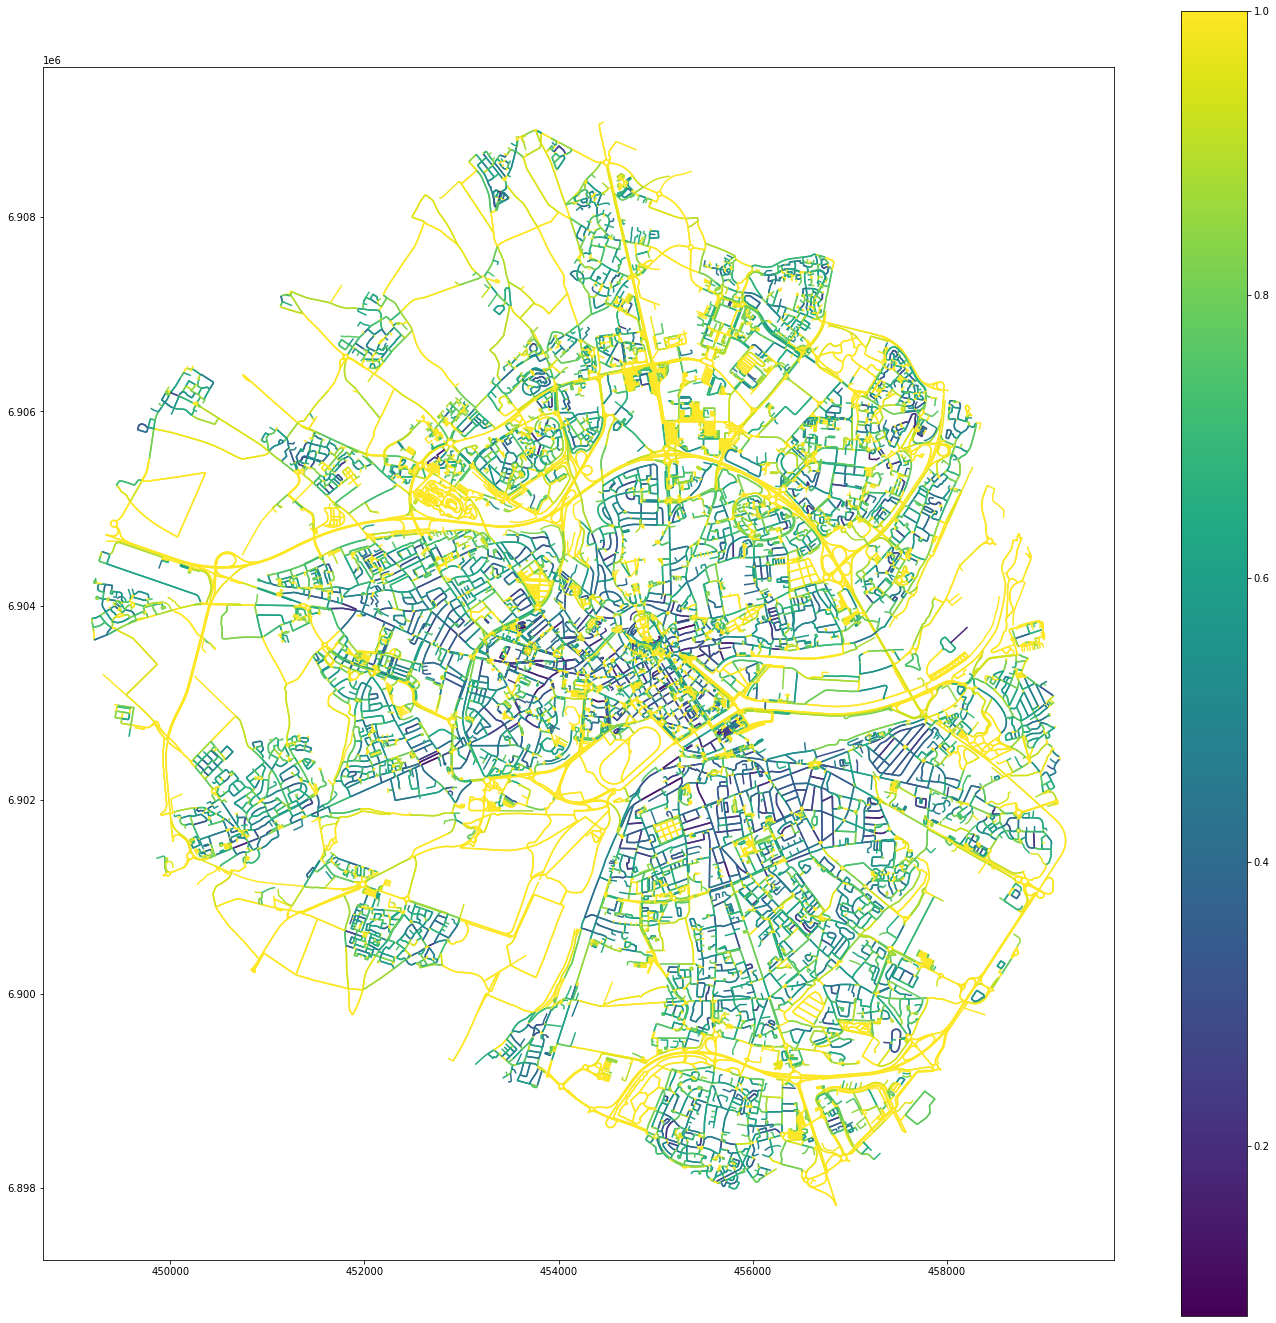

In [58]:
streets.plot('openness', figsize = (24,24), legend = True)

<AxesSubplot:>

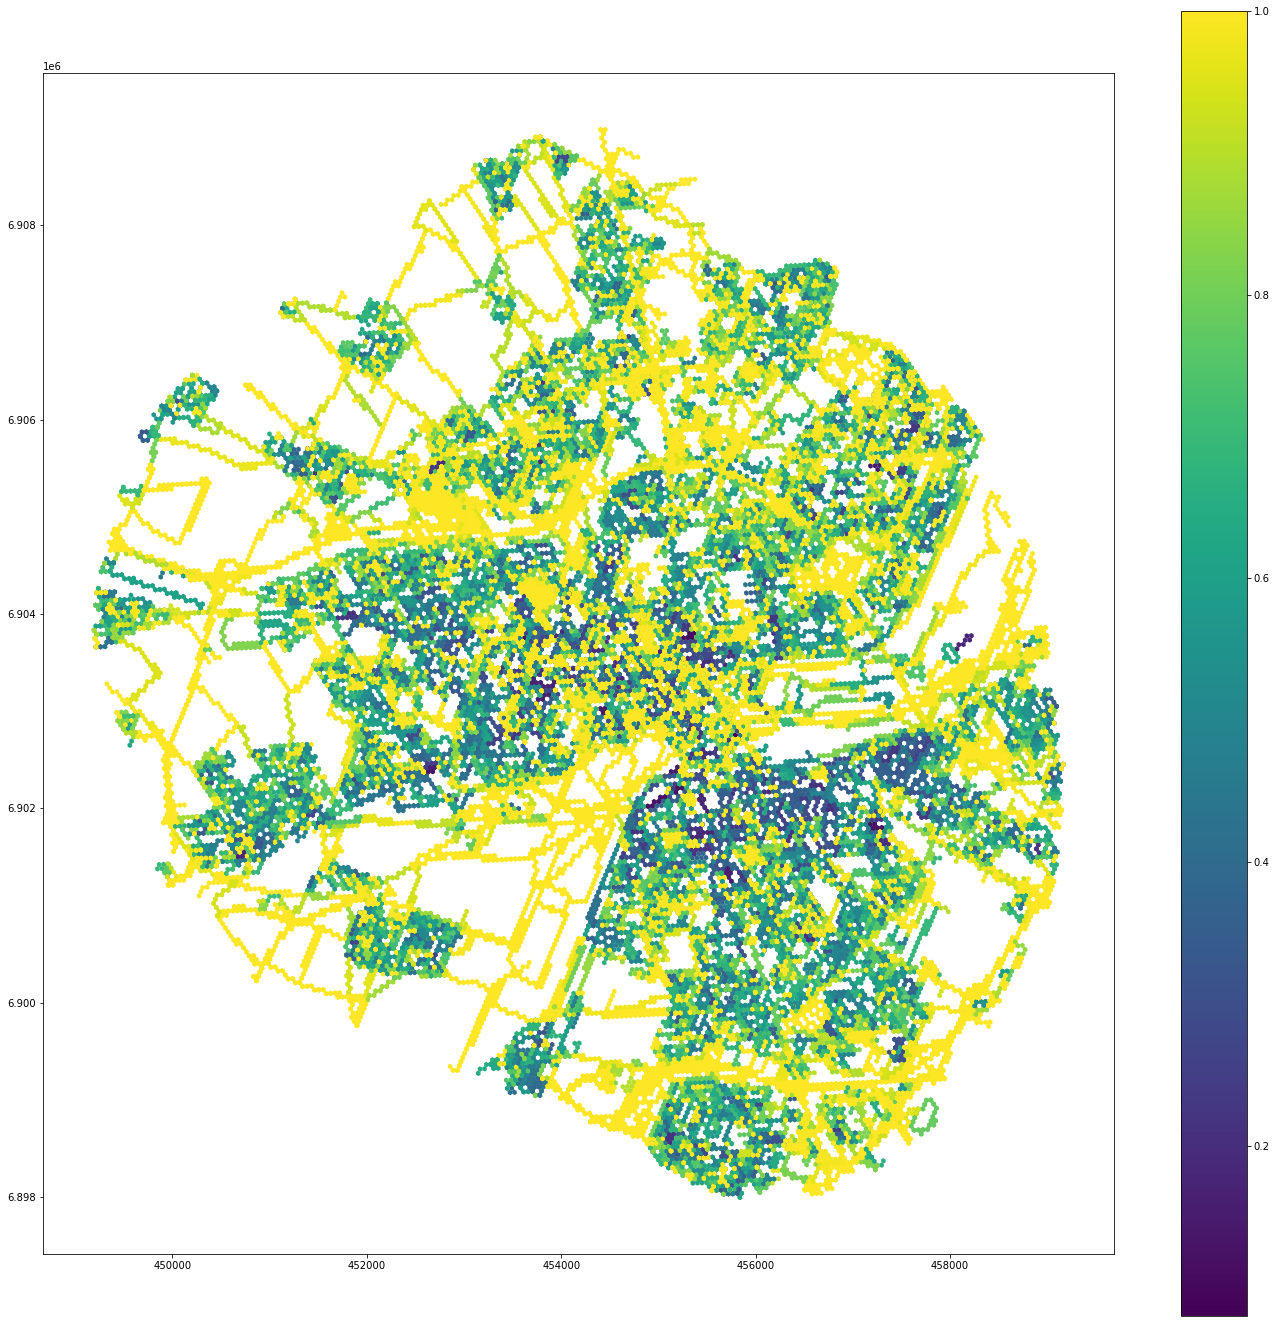

In [60]:
access_streets.plot('openness', figsize = (24,24), legend = True)

<AxesSubplot:>

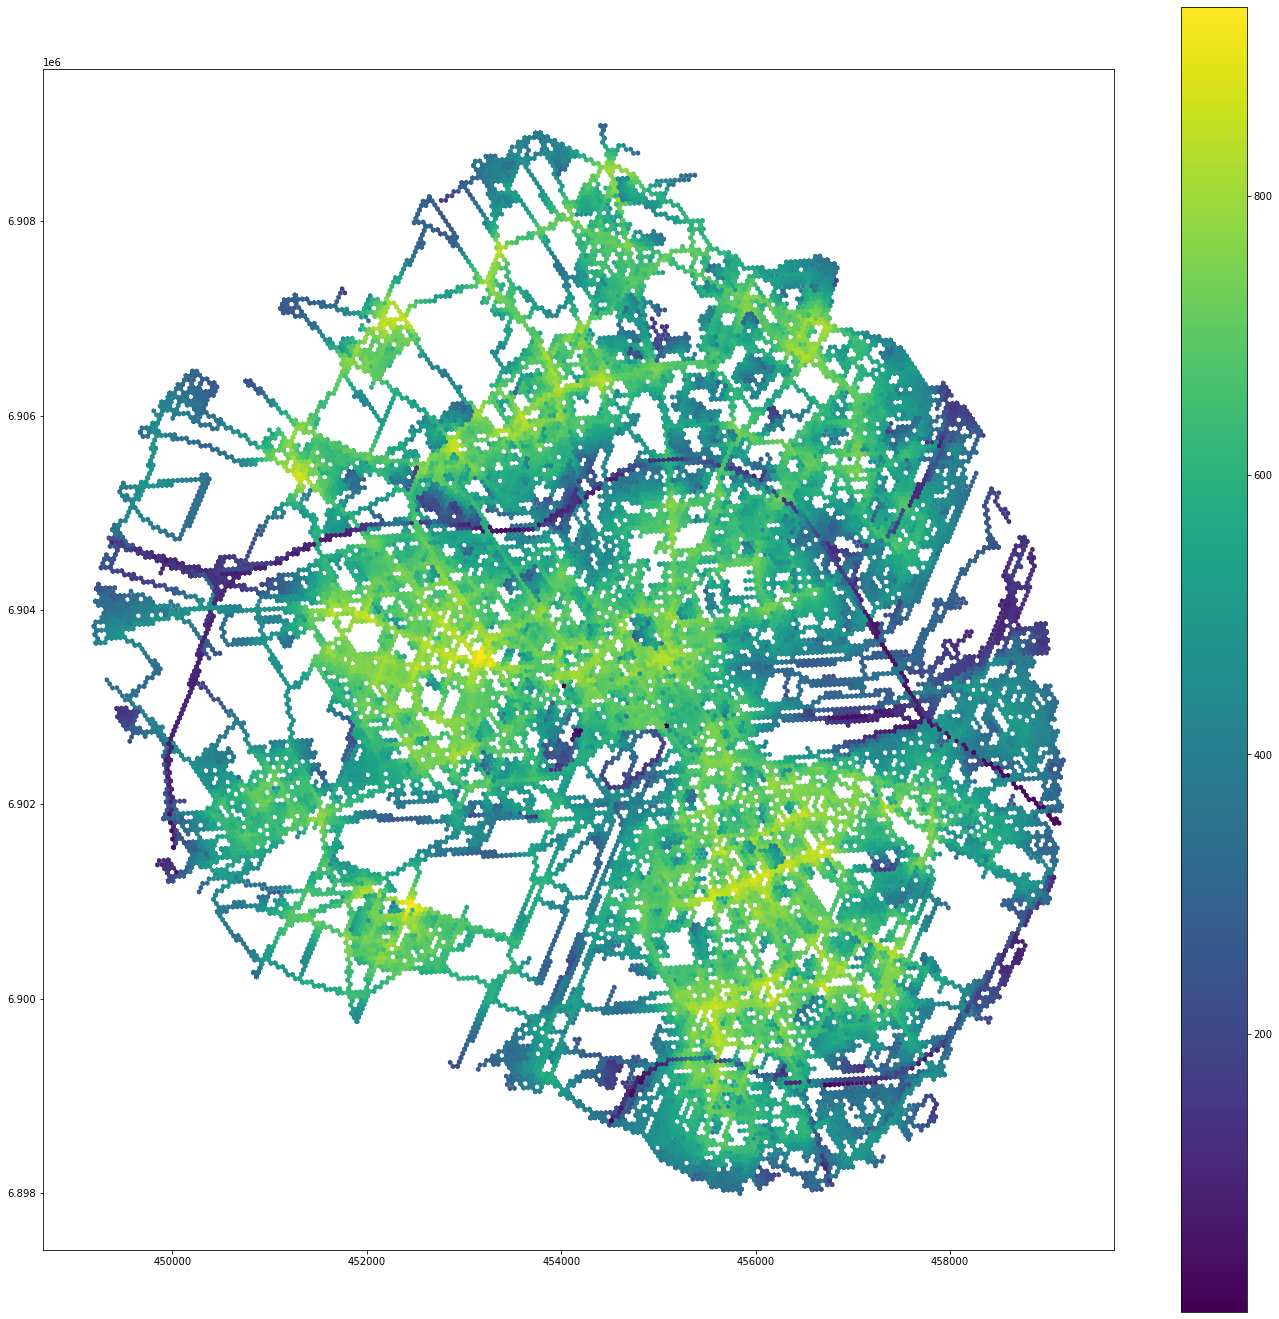

In [61]:
access_streets.plot('access_adults', figsize = (24,24), legend = True)

In [33]:
access_streets = access.to_crs(2154).sjoin(streets, how = 'inner')
access_buildings = access.to_crs(2154).sjoin(buildings, how = 'inner')
access_tessellation = access.to_crs(2154).sjoin(tessellation, how = 'inner')

In [34]:
morpho_access = pd.merge(access_streets,access_buildings, right_on='hex_id', left_on='hex_id', how = 'inner')

In [35]:
morpho_access = pd.merge(morpho_access, access_tessellation, right_on='hex_id', left_on='hex_id', how = 'inner')

In [38]:
# clean columns
morpho_access = morpho_access[['hex_id', 'access_adults', 'access_seniors', 'geometry',
       'length', 'linearity',
       'width', 'width_deviation', 'openness', 'mm_len', 'node_start',
       'node_end',  'eri', 'elongation', 'shared_walls',
       'neighbor_distance', 'interbuilding_distance', 'adjacency', 'nodeID',
       'X__index_level_0__', 
       'dif', 'index_right', 'uID_y', 'nID', 'area_y', 'convexity',
       'neighbors', 'covered_area', 'car']]

In [52]:
variable_names = [
    'linearity',
    'width',
    'eri',
    'openness',
    'adjacency'
]

In [53]:
m1 = spreg.OLS(
    morpho_access[['access_adults']].values,
    morpho_access[variable_names].values,
    name_y = 'access_adults',
    name_x = variable_names
)

Exception: one or more input arrays have missing/NaN values